### Marine animal Detection with Ground Dino

This script will use Grounding Dino to detect different species given an specific text prompt and the compare the intersection over union with ground truth to evaluate the perfomance of the detection model.


First, we import the required libraries

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
#Import some libraries for development
!pip install -U pillow
from google.colab import files
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from pycocotools.coco import COCO
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [ ]:
#Mount the Drive to have acces to documents
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now, we import torch vision and Lang Segment Anything via pip

In [ ]:
#Installing dependencies

!pip install torch torchvision

In [ ]:
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-_r56bit6
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-_r56bit6
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 5dc3a1ac714d5807e5957badf44f001c6ebf2931
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-q01hwdv1/groundingdino_b12bc5cd9d71469b9e9c4d3891ea1b81
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-q01hwdv1/groundingdino_b12bc5cd9d71469b9e9c4d3891ea1b81
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 60d796825e1266e56f7e4e9e00e88de662b67bd3
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [ ]:
from PIL import Image
from lang_sam import LangSAM

The following function will calculate the IoU score given two bounding boxes.

In [ ]:
#Function to calculate the IoU
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
iou_list=list()
Not_generated=0
Bb_info_chair=pd.DataFrame(columns=['id','file_name','object_name','iteration', 'score'])

Now we test the access to the images

3023
62e56f6a-7909-4023-a43d-1fb04ae86d30.png
Caridea
https://fathomnet.org/static/m3/framegrabs/Doc%20Ricketts/images/0634/07_13_02_08.png


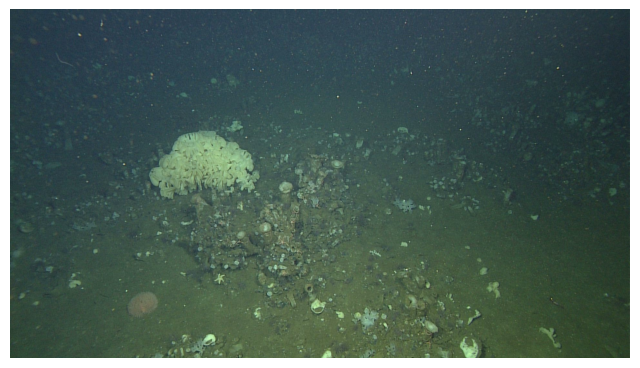

In [ ]:

#read the csv as a dataframe
df = pd.read_csv('drive/MyDrive/path/to/dataset.csv')

df = pd.DataFrame(df)

index = 250

id=df['id'][index]
print(id)
name=df['file_name'][index]
print(name)
name_obj=df['name'][index]
print(name_obj)
url=df['coco_url'][index]
print(url)

I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()


In [ ]:
import requests

We make sure we have access to the annotations. The following code will display an speific image, the data and bouding box coordinates

loading annotations into memory...
Done (t=0.79s)
creating index...
index created!
Caridea
[17, 50, 51, 63, 64, 93, 106, 157, 195, 201, 212, 213, 214, 230, 237, 252, 253, 254, 258, 271, 274, 284, 290, 295, 301, 303, 312, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960,

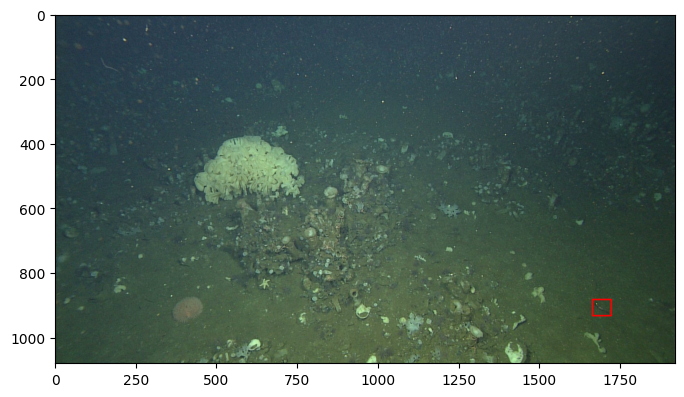

In [ ]:
annFile='drive/MyDrive/Colab_Notebooks/FathomNet/demo_dataset/dataset.json'

# initialize COCO api for instance annotations
coco=COCO(annFile)


# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=[name_obj]);
print(name_obj)
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds)
print(len(imgIds))

print("The id is: ", id)

imgIds = [int(id)]

imgIds = coco.getImgIds(imgIds)

img = coco.loadImgs(imgIds[0])[0]


annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

out_pil_gt=np.asarray(I)
color = (255, 0, 0)
thickness = 3
count = 0

for i in anns:
  count = count + 1
  print("i is ", i)
  [x,y,w,h] = i['bbox']

  start_point_gg = (int(x), int(y))
  end_point_gg = (int(x+w), int(y+h))

  print("The bb of ", count, " is ", start_point_gg, end_point_gg)

  cv2.rectangle(out_pil_gt, start_point_gg, end_point_gg, color, thickness)


plt.imshow(out_pil_gt)



Now we can create a loop that repeats the code for each one of the images in the dataset. It will also compute the intersection over union of the generated box and the ground truth and store the results in a Dataframe.

In [ ]:
for i in range(0, len(df)):
  print("This index is ",i)
  name=df['file_name'][i]
  print("The name of the file is: ", name)
  id=df['id'][i]
  print("The id is: ", id)
  object_name=df['name'][i]
  url=df['coco_url'][i]
  print(url)

  #initialize the variables
  max_iou=0
  I = io.imread(url)
  out_pil_gt=np.asarray(I)
  color = (255, 0, 0)
  thickness = 2
  count = 0
  LSAM_bbox_num = 0
  LSAM_iou_box = 0
  COCO_bbox_num = 0
  COCO_iou_box = 0

   #Getting coco data
  catIds = coco.getCatIds(catNms=[object_name]);
  print("The id is: ", id)
  imgIds = [int(id)]
  imgIds = coco.getImgIds(imgIds)
  img = coco.loadImgs(imgIds[0])[0]
  annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
  anns = coco.loadAnns(annIds)
  print("Anns is ", anns)


  #Predict the Bounding Box
  model = LangSAM()
  image_pil = Image.open(requests.get(url, stream=True).raw).convert("RGB")
  print("The prompt is: ", "Caiman Crocodilus" )
  text_prompt = "Caiman Crocodilus"
  masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)
  print("LSAM finished. Boxes and Phrases: ")
  print(boxes)
  print(phrases)



  print("len(boxes) is: ", len(boxes))

  if(len(boxes)>0):


    for q in range(len(boxes)) :

      #For each bbox coordinate created by LSAM, draw a box and get the start and end point
      start_point = (int(boxes[q][0]), int(boxes[q][1]))
      end_point = (int(boxes[q][2]), int(boxes[q][3]))

      print("The LSAM BBox ", q, " is ", start_point, end_point)

      cv2.rectangle(out_pil_gt, start_point, end_point, color=(0,255,0), thickness=2)

      boxA=start_point + end_point

      #For eaach groudh truth bbox given by coco, draw a box


      for j in anns:

        print("y is ", q)
        [x,y,w,h] = j['bbox']

        start_point_gg = (int(x), int(y))
        end_point_gg = (int(x+w), int(y+h))

        print("The COCO BBox of ", count, " is ", start_point_gg, end_point_gg)

        if (q == 1):
          cv2.rectangle(out_pil_gt, start_point_gg, end_point_gg, color, thickness)

        boxB= start_point_gg + end_point_gg

        #Compute the IoU
        iou=bb_intersection_over_union(boxA, boxB)


        print("The intersection over union score of LSAM bbox ", i, " and COCO bbox ", count,  " is: ", '%.3f'%(iou))
        print("\n")

        if(iou>max_iou):
          max_iou=iou
          LSAM_iou_box=boxA
          COCO_iou_box=boxB
          LSAM_bbox_num = i
          COCO_bbox_num = count

        count = count + 1

    print("The iou is ", max_iou)
    print("The LSAM_iou_box is", LSAM_iou_box)
    print("The COCO_iou_box is ", COCO_iou_box)
    print("The LSAM_bbox_num is ", LSAM_bbox_num)
    print("The COCO_bbox_num is ", COCO_bbox_num)
    iou_list.append(max_iou)
    Bb_info_chair=Bb_info_chair.append({'id':id,'file_name':name, 'object_name':object_name, 'iteration':i , 'score':max_iou }, ignore_index=True)


  else:
    print("The bounding box is empty")
    Not_generated=Not_generated+1
    Bb_info_chair=Bb_info_chair.append({'id':id, 'file_name':name, 'object_name':object_name, 'iteration':i , 'score':'Nan'}, ignore_index=True)


  print("\n")
  print("\n")




Output hidden; open in https://colab.research.google.com to view.

Print the average intersection over union and the number of iages where bounding boxes were generated.

In [ ]:
print(len(iou_list))
avg=sum(iou_list)/len(iou_list)
print(avg)


977
0.5308723939676621


Finally, we convert the Dataframe to a .cvs file

In [ ]:
Bb_info_chair.to_csv('drive/MyDrive/path/to/name.csv')